# Amphi 9 - Support Vector Machines. Introduction to Kernel Method

# 1. Support Vector Machine for Binary Classification - Linear Separable Case

## 1.1. Remind: Logistic Regression

In Logistic Regression for binary classification, we suppose that the boundary is a hyperplan of form $\mathbf w \cdot \mathbf x + b = 0$ and try to find $\mathbf w$, $b$ minimizes:

$$
L(\mathbf w, b, \mathbf X, \mathbf y) = \sum_{n=1}^N l(\mathbf w, b, \mathbf x_n, y_n) 
$$

where $\mathbf X = (\mathbf x_1, \ldots, \mathbf x_N)$, $\mathbf y=(y_1, \ldots, y_N)$ denote the training set, and

$$
l(\mathbf w, b, \mathbf x, y) = y \log \left(\frac1{1 + \exp(-\mathbf w\cdot \mathbf x - b)}\right) + (1-y) \log \left(\frac1{1 + \exp(\mathbf w \cdot \mathbf x + b)}\right)
$$

Remind that when $\frac1{1 + \exp(-\mathbf w\cdot x - b)}$ is the probability that the output is 1 predicted by the logistic regression classifier, and $\frac1{1 + \exp(\mathbf w \cdot x + b)} = 1 - \frac1{1 + \exp(-\mathbf w\cdot x - b)}$ is the probability of output 0. The minus log logit function $-\log\left(\frac1{1+\exp(-z)}\right)$ is used as a "favorizer" of positivity of the argument $z$ because it will attain a value near 0 if $z >> 0$ and very large if $z << 0$, while $-\log\left( \frac1{1+\exp(z)}\right)$ is used as a "favorizer" of negativity of the argument.

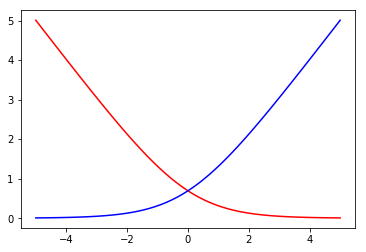

In [128]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

def minusloglogit(z):
    return -np.log(1 / (1 + np.exp(-z)))

def minusloglogit0(z):
    return -np.log(1 / (1 + np.exp(z)))

X = np.linspace(-5, 5, 100)
plt.plot(X, minusloglogit(X), 'r')
plt.plot(X, minusloglogit0(X), 'b')

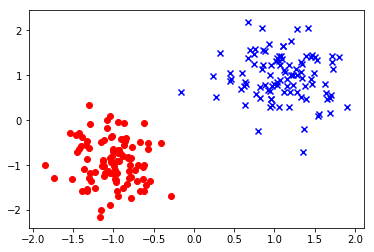

In [129]:
import pandas as pd

data = pd.read_csv("Example2.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

[[2.76362881 1.98566284]]


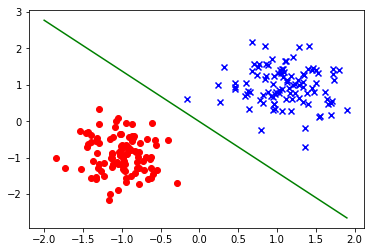

In [130]:
from sklearn.linear_model import LogisticRegression
X = data.values[:,:2]
y = data.values[:,2]

clf = LogisticRegression()
clf.fit(X, y)

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-2, 2, 0.1)
w = clf.coef_
print(w)
b = clf.intercept_
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')

## 1.2 Margin

We are interested in the notion of "margin". Margin is distance between the nearest point to the boundary. In the first picture (logistic regression), the margin is large. In the second one, it is much smaller. In general, we usually prefer classifier possessing large margins. For example, if a new orange point appears that is near to the red cluster, we would rather classify it as a red point than a blue one. This is true if the margin is large in the first case and false in the other case. 

<img src="F1.png" width=600></img>

We would like to find a classifier that maximizes the sum of margins of 2 classes.

## 1.3 The Optimization Problem

If a hyperplan $\mathbf w \cdot \mathbf x + b = 0$ separates correctly two classes of the training set, the distance from $\mathbf x$ (in the training set) to this hyperplan is

$$
\frac{\vert \mathbf w \cdot \mathbf x + b\vert}{\Vert w \Vert} = \begin{cases}
\frac{\left( \mathbf w \cdot \mathbf x + b\right)}{\Vert w \Vert}, \qquad y = 1\\
-\frac{\left( \mathbf w \cdot \mathbf x + b\right)}{\Vert w \Vert}, \qquad y = 0
\end{cases}\\
= (2y-1)\frac{\left( \mathbf w \cdot \mathbf x + b\right)}{\Vert w \Vert}
$$

Denote $2y_n - 1 =: \tilde y_n$ for short (which is $\pm 1$)

So the maximum margin solution is found by solving
$$
\arg\max_{\mathbf w, b} \left( \frac1{\Vert \mathbf w\Vert} \min_n \tilde y_n(\mathbf w \cdot \mathbf x_n + b)\right)
$$

where $\min_n$ denotes minimum on the training set.

This problem is complex to solve. Note that the hyperplan doesn't change if we scale $\mathbf w, b$ by a coefficient, we can set a constraint on $\mathbf w, b$ that $\Vert w \Vert$ equals the margin, i.e:

$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) = 1
$$

for closest point to the hyperplan. Now all data points in the training set will satisfy:

$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1,\qquad n = 1, \ldots N
$$

The maximization problem now becomes:

$$
\arg\max_{\mathbf w, b} \frac1{\Vert \mathbf w\Vert}
$$

where $$\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1,\qquad n = 1, \ldots N $$ and the equality holds for at least one data point. We see that the requirement that equality holds will always automatically satisfy (otherwise a smaller $\Vert \mathbf w \Vert$ still satisfies all the constraints), hence we ignore it from the optimization problem. Besides, maximizing $\frac1{\Vert \mathbf w \Vert}$ is equivalent to minimizing $\Vert \mathbf w \Vert^2$. The problem becomes:

$$
\arg\min_{\mathbf w, b} \frac12 \Vert \mathbf w \Vert^2
$$

subject to
$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1,\qquad n = 1, \ldots N
$$

(coefficient $\frac12$ will be convenient for later uses).

## 1.4 Lagrange Method and The Dual Representation

By Lagrange method, we can introduce Lagrange multipliers $a_n \geq 0$

$$
L(\mathbf w, b, \mathbf a) = \frac12 \Vert \mathbf w \Vert^2 - \sum_{n=1}^N a_n \left( \tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1 \right)
$$

Setting the derivatives of $L(\mathbf w, b, \mathbf a)$ w.r.t $\mathbf w, b$ equal to 0, we get:

$$
\mathbf w = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n, 
$$

$$
\sum_{n=1}^N a_n \tilde y_n = 0
$$

We get
$$
\Vert \mathbf w \Vert^2 = \sum_{n=1}^N\sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

The dual representation of the maximum margin problem becomes:
$$
\arg\max_{\mathbf a}\tilde L (\mathbf a) = \arg\max_{a}\sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$
s.t.
$$
a_n \geq 0, \qquad n = 1, \ldots, N \\
\sum_{n=1}^N a_n \tilde y_n = 0
$$

This is a quadratic programming problem and can be solved in closed form. (https://en.wikipedia.org/wiki/Quadratic_programming)

## 1.5 Support Vectors. Prediction

Note that the solution of this satisfies the KKT conditions, which requires for each $n = 1, \ldots, N$:

$$
a_n \geq 0 \\
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1\geq 0 \\
a_n (\tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1) = 0
$$

The points satisfying $\tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1 = 0$ are the nearest points to the boundary and called **support vectors**. The points where $a_n = 0$ are not support vectors and have no role in later prediction. Indeed, prediction can be done by calculating

$$
\mathbf w \cdot \mathbf x + b = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n \cdot \mathbf x + b = \sum_{m \in \mathcal S} a_n \tilde y_m \mathbf x_m \cdot \mathbf x + b
$$

where $\mathcal S$ denotes the set of indices of support vectors, and classification is based on sign of this quantity.

To determine $b$, use
$$
\tilde y_n \left( \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n + b \right) = 1
$$

for all $n \in \mathcal S$. Multiplying both side of these equations by $\tilde y_n^2$, we have

$$
 \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n + b  = \tilde y_n
$$



We finally find out:
$$
b = \frac1{|\mathcal S|} \sum_{n \in \mathcal S} \left( \tilde y_n - \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n \right)
$$

After solving the problem and find out $\mathbf w, b$, the hyperplan $\mathbf w \cdot \mathbf x + b = 0$ will be called the **decision boundary** while $\mathbf w \cdot \mathbf x + b = \pm 1$ will be called **margin boundaries**.

## 1.6 ERM Representation

Support vector machine for linear separable case is represented by the optimization problem:

$$
\arg\min_{\mathbf w, b} \Vert \mathbf w \Vert^2
$$

s.t
$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1
$$

This problem is equivalent to:
$$
\arg\min_{\mathbf w, b} E_{\infty} \left( \tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1 \right) + \lambda \Vert w\Vert^2
$$

where $E_{\infty}(z) = 0$ if $z \geq 0$ and $+\infty$ if $z < 0$.

As an ERM representation, SVM optimization problem can be expressed by

$$
\hat y = \mathbf w \cdot \mathbf x + b
$$

$$
l(y, \hat y) = E_{\infty}(y \hat y - 1)
$$

and regularization $\Vert \mathbf w \Vert^2$. 

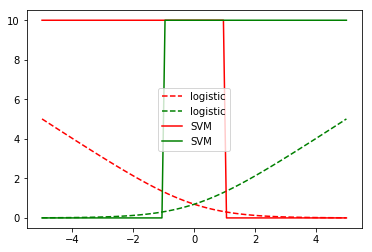

In [131]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, sys

INFINITY = 10

def infinityLoss(z):
    if z >= 1:
        return 0
    return INFINITY

def minusInfinityLoss(z):
    if z <= -1:
        return 0
    return INFINITY

myspace = np.linspace(-5, 5, 100)
plt.plot(myspace, minusloglogit(myspace), 'r--', label="logistic")
plt.plot(myspace, minusloglogit0(myspace), 'g--', label="logistic")
plt.plot(myspace, [infinityLoss(z) for z in myspace], 'r-', label="SVM")
plt.plot(myspace, [minusInfinityLoss(z) for z in myspace], 'g-', label="SVM")
plt.legend()

## 1.7 Implementation

** In case of linear separability, use large C for sklearn implementation **

In [132]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Boundary**

In [133]:
w = clf.coef_
w

array([[1.65488693, 1.85627221]])

In [134]:
b = clf.intercept_
b

array([0.1118497])

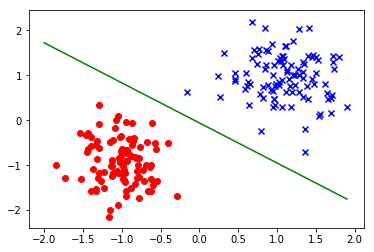

In [135]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-2, 2, 0.1)
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')

**Support vectors**

In [136]:
clf.support_

array([  0, 116, 153])

In [137]:
clf.support_vectors_

array([[-0.6135, -0.0521],
       [-0.1585,  0.6198],
       [ 0.7992, -0.234 ]])

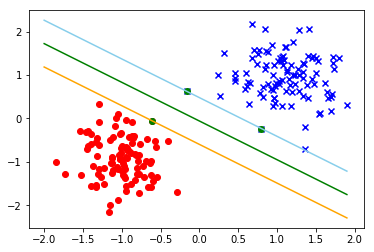

In [138]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-2, 2, 0.1)
# Decision boundary wx + b = 0
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')
# Margin boundary wx + b = -1
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - (b + 1)/w[0,1], 'orange')
# Margin boundary wx + b = 1
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - (b - 1)/w[0,1], 'skyblue')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], color='green', marker='o')

**Dual coefficients ($a_n$)**

In [139]:
clf.dual_coef_

array([[-3.09188504,  2.83284856,  0.25903648]])

# 2. Support Vector Machine for Binary Classification. Non Linear-Separable Case

## 2.1 The Optimization Problem

Using the same minimization problem as in the case of linear-separability, a mis-classified point will lead to infinity loss for ERM representation in 1.6. A not linearly separable dataset will give no solution to the constraint satisfaction problem (CSP) in 1.3. Hence, if we are dealing with data that are not linearly separable, we must modify the CSP (hence modify the loss function in ERM representation).

We will introduce the variables $\xi_n$, $n = 1, \ldots, N$ that modelize penalty for miss classified data points. If the data point is on the right side and inside the supported zone (i.e, has greater distance to the boundary than the support vectors), we will have $\xi_n  = 0$, otherwise $\xi_n$ will be proportional to the distance to the margin boundary of the correct side. $\xi_n$ are called slack variables. The linear-separable case is also called **soft margin** case.

We would prefer $\xi_n$ not too large, so we want $\sum_{n=1}^N \xi_n$ to be small. The problem now becomes:

$$
\arg\min_{\mathbf w, b} \frac12 \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n
$$

s.t.

$$
\xi_n \geq 0, \qquad n = 1, \ldots, N \\
\tilde y_n (\mathbf w \cdot \mathbf x + b) \geq 1 - \xi_n
$$

where $C>0$ is a penalization coefficient that controls the trade-off between the slack variables and the margin.

## 2.2 The Dual Representation

Similarly to the linearly-separable case, we can introduce the Lagrangian

$$
L(\mathbf w, b, \mathbf a, \mathbf \mu) = \frac12 \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n - \sum_{n=1}^N a_n(\tilde y_n (\mathbf w \cdot \mathbf x + b) - 1 + \xi_n) - \sum_{n=1}^N \mu_n \xi_n
$$.

The KKT conditions become:
$$
a_n \geq 0 \\
\tilde y_n (\mathbf w \cdot \mathbf x + b) - 1 + \xi_n \geq 0 \\
a_n(\tilde y_n (\mathbf w \cdot \mathbf x + b) - 1 + \xi_n) = 0 \\
\mu_n \geq 0 \\
\xi_n \geq 0 \\
\mu_n \xi_n = 0 \\
$$

where $n = 1, \ldots, N$.

Let $\partial L/\partial \mathbf w, \partial L/\partial b, \partial L/\partial \xi_n = 0 $ we have

$$
\mathbf w = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n\\
\sum_{n=1}^N a_n \tilde y_n = 0 \\
a_n = C - \mu_n
$$

The dual representation becomes:

$$
\arg\max_{\mathbf a, \mathbf \mu} \sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

s.t.
$$
a_n \geq 0 \\
\mu_n \geq 0 \\
\sum_{n=1}^N a_n \tilde y_n = 0 
$$

Using $a_n = C - \mu_n$, we get the dual representation depending only on $\mathbf a$:

$$
\arg\max_{\mathbf a} \sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

s.t.
$$
0 \leq a_n \leq C \\
\sum_{n=1}^N a_n \tilde y_n = 0 
$$

The conditions $0 \leq a_n \leq C$ are called the box constraints. This is a quadratic programming problem.

## 2.3 Solution. Prediction

- Points corresponding to $a_n = 0$ can be discarded, they have no role to the prediction.
- Points corresponding to $a_n = C$ can have $\xi_n > 0$. They can lie inside the margin and can either be correctly classified if $\xi_n \leq 1$ or mis-classified if $\xi_n > 1$.
- Points corresponding to $0 < a_n < C$ have $\xi_n = 0$, they belong to $\tilde y_n(\mathbf w \cdot \mathbf x_n + b) = 1$ (the margin).

<img src="F2.png"></img>

Let $\mathcal S$ be the set of indices of points corresponding to $a_n \geq 0$ (type 2, 3). They are called support vectors.

Let $\mathcal M$ be the set of indices of points corresponding to $0 < a_n < C$ (type 3). They lie on the margins.

$b$ can be calculated using
$$
\mathbf w \cdot \mathbf x_n + b = \tilde y_n, \qquad n \in \mathcal M
$$

$$
\Leftrightarrow y\mathbf \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m\cdot \mathbf x_n + b = \tilde y_n, \qquad n \in \mathcal M
$$

Sum up to give
$$
b = \frac1{|\mathcal M|}\sum_{n \in \mathcal M} \left( \tilde y_n - \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n \right)
$$


**Prediction** can be done by calculating

$$
\mathbf w \cdot \mathbf x + b = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n \cdot \mathbf x + b = \sum_{m \in \mathcal S} a_n \tilde y_m \mathbf x_m \cdot \mathbf x + b
$$

and classification is made using this quantity's sign.

## 2.4 ERM Representation

Recall the CSP representation of the problem:

$$
\arg\min_{\mathbf w, b} \frac12 \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n
$$

s.t.

$$
\xi_n \geq 0, \qquad n = 1, \ldots, N \\
\tilde y_n (\mathbf w \cdot \mathbf x + b) \geq 1 - \xi_n
$$

The problem can be represented as

$$
\arg\min_{\mathbf w, b} \frac1{2C} \Vert w\Vert^2 + \sum_{n=1}^N \left[1 - \tilde y_n(\mathbf w \cdot \mathbf x + b) \right]_+
$$

As an ERM representation, SVM optimization problem can be expressed by

$$
\hat y = \mathbf w \cdot \mathbf x + b
$$

$$
l(y, \hat y) = E_{SV} (y\hat y) = \left[1 - y\hat y \right]_+
$$

and regularization $\Vert \mathbf w \Vert^2$, where $a_+$ denotes the positive part of $a$. $E_{SV}$ is called the **hinge** error function.

To compare with Logistic Regression.

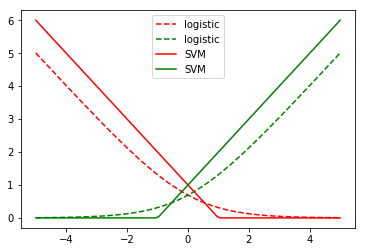

In [140]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, sys

INFINITY = 10

def HingeLoss(z):
    return ((1 - z) + abs(1 - z)) / 2

def HingeLossMinus(z):
    return ((1 + z) + abs(1 + z)) / 2    

myspace = np.linspace(-5, 5, 100)
plt.plot(myspace, minusloglogit(myspace), 'r--', label="logistic")
plt.plot(myspace, minusloglogit0(myspace), 'g--', label="logistic")
plt.plot(myspace, [HingeLoss(z) for z in myspace], 'r-', label="SVM")
plt.plot(myspace, [HingeLossMinus(z) for z in myspace], 'g-', label="SVM")
plt.legend()

## 2.5 Implementation

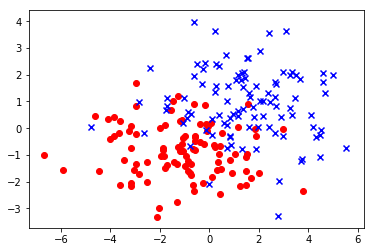

In [141]:
data = pd.read_csv("Example1.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

X = data.values[:,:2]
y = data.values[:,2]

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
w = clf.coef_
w

array([[0.5194304 , 1.02593164]])

In [144]:
b = clf.intercept_
b

array([-0.20002904])

In [145]:
clf.support_

array([  0,   1,  15,  16,  17,  18,  20,  21,  22,  25,  26,  29,  31,
        32,  33,  35,  40,  43,  44,  51,  52,  55,  58,  59,  60,  65,
        67,  70,  72,  73,  75,  82,  86,  92,  96,  99, 100, 107, 110,
       111, 112, 115, 116, 118, 124, 125, 128, 130, 131, 139, 141, 145,
       147, 153, 157, 158, 161, 165, 166, 172, 175, 176, 183, 184, 189,
       190, 191, 192, 193, 196, 197, 198])

In [146]:
y_pred = clf.predict(X)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.])

In [147]:
np.array([i for i in range(len(X)) if y_pred[i] != y[i]])
# Should be a subset of support vectors

array([  0,   1,  15,  21,  33,  40,  52,  70,  73,  75, 100, 107, 110,
       115, 116, 118, 125, 130, 139, 141, 145, 153, 166, 172, 175, 183,
       184, 189, 191, 196, 198])

In [148]:
clf.decision_function(X)

array([ 1.53772801,  0.47617821, -2.29633056, -2.83132447, -4.06124059,
       -1.74790965, -3.39517212, -2.49745817, -2.93063795, -1.95013572,
       -2.04154003, -3.43219497, -1.01055419, -1.68308215, -2.70938442,
        0.03345135, -0.23281741, -0.67082176, -0.98362899, -3.70268763,
       -0.53029246,  0.42999986, -0.99973763, -2.5039206 , -1.34404744,
       -0.66292178, -0.99479446, -2.38888744, -1.75999987, -0.37073443,
       -1.88325732, -0.67408313, -0.84526404,  0.44406388, -1.3959584 ,
       -0.82246806, -1.3227039 , -3.97166017, -2.67079346, -1.21924389,
        1.31522999, -1.6917555 , -1.64995968, -0.78624153, -0.33062044,
       -1.96688394, -1.4443731 , -2.21304322, -2.48888593, -4.2664121 ,
       -2.00722918, -0.41430772,  0.73103757, -1.79798438, -2.27343442,
       -0.43733609, -1.5501279 , -2.73682815, -0.9165661 , -0.0245055 ,
       -0.76973515, -1.76670486, -1.94928495, -1.77202989, -3.59490234,
       -0.12990927, -4.17351346, -0.53505659, -1.96913542, -1.56

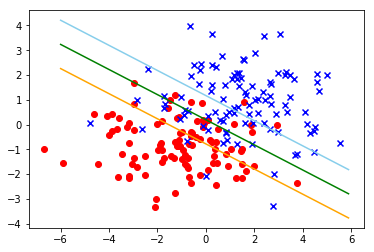

In [149]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-6, 6, 0.1)
# Decision boundary wx + b = 0
plt.plot(my_range, -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')
# Margin boundary wx + b = -1
plt.plot(my_range, -w[0,0]/w[0,1]*my_range - (b + 1)/w[0,1], 'orange')
# Margin boundary wx + b = 1
plt.plot(my_range, -w[0,0]/w[0,1]*my_range - (b - 1)/w[0,1], 'skyblue')

# 3. Support Vector Machine for Multiclass Classification

SVM can be generalized to multiclass classification by one of the known strategies:
- OVR (One vs Rest)
- OVO (One vs One)
- Hierarchical Strategies

# 4. Support Vector Machine for Regression



## 4.1 The $\epsilon$-insensitive Error Function

In linear regression, the loss function being used is:

$$
\mathbf l(y, y') = \mathbf (y - y')^2 
$$

In regularization case, this becomes:
$$
L(y, y') = \sum_{n=1}^N |y_n - y_n'|^2 + C\Vert \mathbf w \Vert^2
$$

We introduce a new error function that allows some insensitive error $\epsilon$ as follows: if the difference between the real and the prediction value does not exceed $\epsilon$, we accept that the loss can be ignored.

$$
l_{\epsilon} (y, y') =
\begin{cases}
0, if \qquad |y - y'| < \epsilon \\
|y - y'| - \epsilon, if \qquad |y - y'| \geq \epsilon
\end{cases}
$$

So, by introducing the $\epsilon-$insensitive error function, we want to find $\mathbf w, b$ that minimize
$$
L_{\epsilon}(\mathbf w, b) = \sum_{n=1}^N l_{\epsilon} (y_n, \mathbf w \cdot \mathbf x_n + b) + \lambda \Vert w \Vert^2 = \sum_{n=1}^N [|\mathbf w \cdot \mathbf x_n + b - y_n| - \epsilon]_+ + \lambda \Vert w \Vert^2
$$

This is the ERM-representation of the support vector machine method for regression (**SVR**).

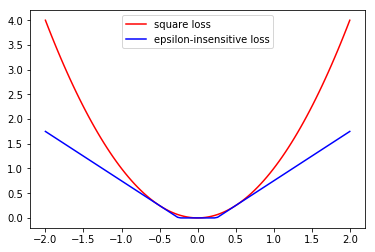

In [150]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

epsilon = 0.25
X = np.linspace(-2, 2, 100)

def square_loss(x):
    return x**2

def epsilon_insensitive_loss(x, epsilon):
    return np.maximum(abs(x) - epsilon, 0)

plt.plot(X, square_loss(X), 'r', label="square loss")
plt.plot(X, epsilon_insensitive_loss(X, epsilon), 'b', label='epsilon-insensitive loss')
plt.legend()

## 4.2 The Optimization Problem

For each data point $(\mathbf x_n, y_n)$, we introduce a slack variable $\xi_n \geq 0$ and a slack variable $\hat \xi_n \geq 0$ where

- $\xi_n > 0$ corresponds to a point where $y_n > \mathbf w \cdot \mathbf x_n + b + \epsilon$
- $\hat \xi_n > 0$ corresponds to a point where $y_n < \mathbf w \cdot \mathbf x_n + b - \epsilon$
- $\xi_n = 0$ and $\hat \xi_n = 0$ corresponds to a point where $\mathbf w \cdot \mathbf x_n + b - \epsilon \leq y_n \leq \mathbf w \cdot \mathbf x_n + b + \epsilon$

The constraints favorizing $y_n$ between $(\mathbf w \cdot \mathbf x_n) \pm \epsilon$, as in the classification problem, can now be reformulated as:
$$
\mathbf w \cdot \mathbf x_n - \epsilon - \hat \xi_n \leq y_n \leq \mathbf w \cdot \mathbf x_n + \epsilon
$$

And the error function becomes:
$$
\sum_{n=1}^N (\xi + \hat \xi) + \lambda \Vert w \Vert^2
$$

By scaling, it is equivalent to minimizing the function:
$$
\frac12 \Vert w \Vert^2 + C\sum_{n=1}^N(\xi_n + \hat \xi_n)
$$

s.t
$$
\xi_n \geq 0 \\
\hat \xi_n \geq 0 \\
\mathbf w \cdot \mathbf x_n + b + \xi_n + \epsilon - y_n \geq 0\\
\mathbf w \cdot \mathbf x_n + b - \xi_n - \epsilon - y_n \leq 0\\
$$

This is the CSP problem for SVR.

## 4.3 Solution to the Optimization Problem

By introducing the Lagrange coefficients, as in classification case, $a_n \geq 0$, $\hat a_n \geq 0$, $\mu_n \geq 0$, $\hat \mu_n \geq 0$, we have the Lagrangian

$$
L = C\sum_{n=1}^N (\xi_n + \hat \xi_n) + \frac12 \Vert w \Vert^2 - \sum_{n=1}^N (\mu_n \xi_n + \hat \mu_n \hat \xi_n) - \sum_{n=1}^N a_n (\mathbf w\cdot \mathbf x_n + b + \xi_n + \epsilon - y_n) - \sum_{n=1}^N a_n (-\mathbf w\cdot \mathbf x_n + b - \xi_n - \epsilon - y_n)
$$

by taking derivatives w.r.t $\mathbf w, b, \xi_n, \hat \xi_n$:

$$
\partial L / \partial \mathbf w = 0 \Leftrightarrow \mathbf w = \sum_{n=1}^N(a_n - \hat a_n)\mathbf x_n
$$

$$
\partial L / \partial b = 0 \Leftrightarrow \sum_{n=1}^N (a_n - \hat a_n) = 0
$$

$$
\partial L / \xi_n = 0 \Leftrightarrow a_n + \mu_n = 0 
$$

$$
\partial L / \hat \xi_n = 0 \Leftrightarrow \hat a_n + \hat \mu_n = 0
$$

Finally, the dual problem can be written as:

$$
\tilde L(\mathbf a, \hat{\mathbf a}) = -\frac12 \sum_{n=1}^N \sum_{m=1}^N (a_n - \hat a_n)(a_m - \hat a_m)\mathbf x_n \cdot \mathbf x_m - \epsilon \sum_{n=1}^N (a_n + \hat a_n) - \sum_{n=1}^N(a_n - \hat a_n) y_n
$$

s.t.
$$
0 \leq a_n \leq C\\
0 \leq \hat a_n \leq C\\
\sum_{n=1}^N (a_n - \hat a_n) = 0
$$

This is, again, a quadratic programming problem. After having found $a_n, \hat a_n$, the prediction can be done by
$$
f(\mathbf x) = \mathbf w \cdot \mathbf x = \sum_{n=1}^N (a_n - \hat a_n)\mathbf x_n \cdot \mathbf x + b
$$

where 
$$
b = y_n - \epsilon - \mathbf w \cdot \mathbf x_n = y_n - \epsilon - \sum_{m=1}^N(a_m - \hat a_m) \mathbf x_m \cdot \mathbf x_n
$$

for some $n$.

## 4.4. Support Vectors

By KKT theorem, the following equalities hold:
$$
(C-a_n) \xi_n = 0 \\
(C-\hat a_n)\hat \xi_n = 0 \\
a_n (\mathbf w \cdot \mathbf x_n + b + \xi_n + \epsilon - y_n) = 0\\
\hat a_n(\mathbf w \cdot \mathbf x_n + b - \xi_n - \epsilon - y_n) = 0\\
$$

We can classify the points into the following categories:

- Points with $a_n$ and $\hat a_n = 0$ have no role in prediction.
- Points with $0 < a_n < C$ or $0 < \hat a_n < C$ will have $\xi_n = 0$, they are outside the good margin boundary.
- Points with $a_n = C$ lie on the margin boundary.

Points of type 2 and 3 are, again, called support vectors. 



## 4.5 Implementation

In [151]:
import pandas as pd

data = pd.read_csv("SVRData.csv", sep=",", header=None)
data.head()

,0,1
0,3.593647,-3.752560
1,2.103280,-7.461048
2,0.244790,0.750907
3,0.381638,0.757323
4,-0.732329,2.963808


In [152]:
X_train = data.iloc[:100, 0:1].values
y_train = data.iloc[:100, 1].values
X_test = data.iloc[100:, 0:1].values
y_test = data.iloc[100:, 1].values

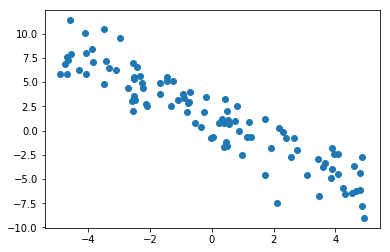

In [153]:
plt.scatter(X_train, y_train)

In [154]:
from sklearn.svm import SVR
import numpy as np

epsilon = 2
clf = SVR(epsilon = epsilon, kernel = "linear")
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=2, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Learnt coefficients w, b**

In [155]:
clf.coef_

array([[-1.44982737]])

In [156]:
clf.intercept_

array([1.34571846])

**Support vectors**

In [157]:
clf.support_

array([ 1,  8, 19, 21, 26, 30, 31, 34, 35, 43, 44, 45, 47, 50, 51, 55, 58,
       60, 62, 66, 67, 69, 70, 82, 87, 96, 98])

In [158]:
clf.support_vectors_

array([[ 2.10328028],
       [-2.58664379],
       [ 0.37974713],
       [-1.46826374],
       [-2.56602415],
       [-4.91518346],
       [ 4.10076614],
       [-4.59564666],
       [-4.11667506],
       [ 0.41453653],
       [-4.6987654 ],
       [ 3.45552055],
       [ 4.8689181 ],
       [ 1.71143378],
       [ 4.92958697],
       [-1.25048812],
       [ 2.16441719],
       [ 0.98549722],
       [ 3.97096418],
       [ 0.50204385],
       [-0.02730656],
       [ 0.8030457 ],
       [ 3.8785509 ],
       [ 4.86031016],
       [ 1.72356086],
       [-3.48165119],
       [-2.99013291]])

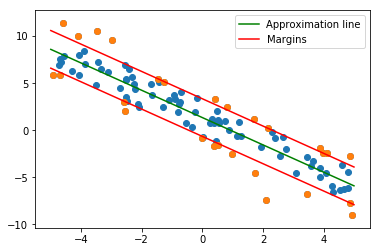

In [159]:
plt.scatter(X_train, y_train)
plt.scatter(X_train[clf.support_], y_train[clf.support_])

interval = np.linspace(-5, 5, 100)
w = clf.coef_[0, 0]
b = clf.intercept_[0]
plt.plot(interval, w * interval + b, 'g', label = "Approximation line")
plt.plot(interval, w * interval + b + epsilon, 'r', label = "Margins")
plt.plot(interval, w * interval + b - epsilon, 'r')
plt.legend()

**Prediction**

In [160]:
y_pred = clf.predict(X_test)
y_pred

array([ 7.75572104e+00, -5.74096280e+00,  1.57570534e+00, -1.84326392e+00,
       -3.56472014e-01,  8.16042154e+00, -1.70242790e+00,  2.66865390e+00,
       -4.76706642e+00, -1.85123809e-01,  5.72938470e+00, -1.43652899e+00,
        5.46224894e-01, -4.47926963e+00,  4.01760455e+00, -4.51364133e+00,
        5.89589406e+00, -1.05384754e+00, -2.84892227e+00,  7.36803409e+00,
       -1.03644560e-01,  1.02975349e+00, -5.36417058e+00, -5.35664592e+00,
       -5.16292746e+00,  2.02906971e+00,  9.74425411e-01, -2.87367509e+00,
        1.92075029e+00, -2.05171454e+00, -3.65073586e+00, -1.89544337e+00,
        6.35747520e+00,  8.13800342e-01,  7.82562503e-01,  2.09607545e+00,
       -7.30696122e-01, -1.65667889e+00, -7.79312060e-01,  5.87516676e+00,
        4.75510333e-01, -2.81929755e+00,  1.66976821e+00, -2.57959146e+00,
        1.70488340e+00,  7.38662780e-01,  3.69366447e+00,  4.68207941e+00,
       -8.49898925e-01,  7.52832645e+00,  4.66755219e+00,  4.67743554e+00,
        2.96136482e+00, -

In [161]:
clf.score(X_test, y_test) #R2 score

0.8108525741117112


# 5. Kernel Methods

## 5.1 Non-linearly Separable Problems

We have seen that, training a SVM is maximizing the dual problem:
$$
\tilde L(\mathbf a) = \sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

s.t.
$$
0 \leq a_n \leq C\\
\sum_{n=1}^N a_n \tilde y_n = 0
$$

The decision function for new vectors is given by
$$
f(\mathbf x) = \mathbf w \cdot \mathbf x + b = \sum_{\mathcal S} a_n \tilde y_n \mathbf x_n\cdot \mathbf x + \frac1{|\mathcal M|}\sum_{\mathcal M}(\tilde y_n - \sum_{\mathcal S}a_m \tilde y_m \mathcal x_m\cdot \mathcal x_n)
$$

Classification is done based on the sign of this quantity.

In both training and prediction phases, only inner products of the vectors are important, i.e, if we don't know what $\mathbf x_n$, $\mathbf x_m$ but can find out a way to compute $\mathbf x_n \cdot \mathbf x_m$ and in general for $\mathbf x \cdot \mathbf y$ for any pair $\mathbf x, \mathbf y \in \mathbf R^d$, we can reconstruct the training and prediction phase. This idea can be generalized to a strategy called **Kernel methods**.

In the following example, we see that a non-linearly separable problem can become linearly separable if we apply a transformation:

<img src = "F4.png" width=600></img>

If we put $p = (x, y)$ and $\phi(p) = (x, y, x^2 + y^2)$, then
$$
K(p_1, p_2) := \phi(p_1)\cdot \phi(p_2) = x_1 x_2 + y_1 y_2 + (x_1^2 + y_1^2)(x_2^2 + y_2^2)
$$

If we train the model by applying the dual problem:
$$
\tilde L(\mathbf a) = \sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m K(\mathbf x_n, \mathbf x_m)
$$

s.t.
$$
0 \leq a_n \leq C\\
\sum_{n=1}^N a_n \tilde y_n = 0
$$

and using the decision function:
$$
f(\mathbf x) = \mathbf w \cdot \mathbf x + b = \sum_{\mathcal S} a_n \tilde y_n K(\mathbf x_n, \mathbf x) + b
$$

then it is equivalent to solving the classification for $\phi(p)$ in $3D$.

We see that in bose training and prediction phases, the importance is knowing how to calculate:
$$
K(p_1, p_2) = x_1 x_2 + y_1 y_2 + (x_1^2 + y_1^2)(x_2^2 + y_2^2)
$$

The knowledge abour $\phi(p)$ (i.e., the mapping transforming the space to a linearly separable space so that the data become linearly separable), can be ignored.

## 5.2 Formalization

**Definition - Positive Definite Kernels**

*Let $X$ be a set. A mapping* $$K: \mathbf X \times X \to \mathbf R$$
$$
(x, y) \mapsto K(x, y)
$$
*is called a positive definite kernel if for any $\{ x_1, \ldots, x_L\}$, $x_i \in X$, the Gram matrix*
$$
\mathbf K = \begin{pmatrix}
K(x_1, x_1), \ldots, K(x_1, x_L)\\
\cdots \\
K(x_L, x_1), \ldots, K(x_L, x_L)
\end{pmatrix}
$$

*is semipositive definite.*

**Example**
The mapping in section 5.1 is a positive definite kernel.

**Definition - Reproducing Kernel Hilbert Space (RKHS) **

*Let $X$ be a compact subset of $\mathbf R^n$ and $\mathcal H $ be a Hilbert space $H$ of functions from $X \to \mathbf R$. Then $H$ is a **reproducting kernel Hilbert space (RKHS)** if there exists some positive definite kernel $K: X \times X \to \mathbf R$ such that

- $K$ has the reproducing property: $\langle K(\cdot, x), f \rangle = f(x)$
- $K$ spans $H$, i.e, $\mathrm{span} (\{ k(\cdot, x): x \in \mathcal X\}) = H$

*$K$ is then called a reproducing kernel of $H$*.

**Theorem (Moore-Aronszajn)**

*Let $K: X \times X \to \mathbf R$ be positive definite. Then there is a unique RKHS $\mathcal H \subset \mathbf R^X$ with reproducing kernel $K$.*

**Theorem (The Representer Theorem)**

*Let $K$ be a kernel on $X$ and let $H$ be its associated RKHS. Fix $x_1, \ldots, x_N \in X$, and consider the optimization problem*

$$
\min_{f\in H} D(f(x_1), \ldots, f(x_n)) + P(\Vert f \Vert_{H}^2)
$$

*where $P$ is a non decreasing and $D$ is a function. If the problem has a minizer, then it has a minimizer of the form*
$$
f = \sum_{i=1}^N \alpha_i K(\cdot, x_i)
$$

*where $\alpha_i \in \mathbf R$. Furthermore, if $P$ is strictly increasing, then every solution of the problem has this form*.



## 5.3 Properties of Kernels

Given positive definite kernels $K_1(\mathbf x, \mathbf x'), K_2(\mathbf x, \mathbf x')$ the following kernels are also positive definite:

$$
K(\mathbf x, \mathbf x') = \mathbf K_1(\mathbf x, \mathbf x')\\
K(\mathbf x, \mathbf x') = f(\mathbf x) K_1(\mathbf x, \mathbf x')f(\mathbf x')\\
K(\mathbf x, \mathbf x') = q(K_1(\mathbf x, \mathbf x'))\\
K(\mathbf x, \mathbf x') = \exp(K_1(\mathbf x, \mathbf x'))\\
K(\mathbf x, \mathbf x') = K_1(\mathbf x, \mathbf x') + K_2(\mathbf x, \mathbf x')\\
K(\mathbf x, \mathbf x') = K_1(\mathbf x, \mathbf x')K_2(\mathbf x, \mathbf x')\\
K(\mathbf x, \mathbf x') = \mathbf x^t \cdot \mathbf A \mathbf x'
$$
($q$ is a polynomial with nonnegative coefficients), $f$ is any function, $\mathbf A$ is a symmetric positive semidefinite matrix)

## 5.4 Mostly Used Kernels

(From Mr. Tiep VU's blog, [3])
<table>
    <tr>
        <th>Name</th>
        <th>Function</th>
        <th>Parameter in scikit learn</th>
    </tr>
    <tr>
        <td>Linear</td>
        <td>$\mathbf x \cdot \mathbf  x'$</td>
        <td>`kernel='linear'`</td>
    </tr>
    <tr>
        <td>Polynomial</td>
        <td>$(r + \gamma \mathbf x \cdot \mathbf x')^d$</td>
        <td>`kernel='poly', degree = d, gamma = g, coef0 = r`</td>
    </tr>   
    <tr>
        <td>Sigmoid</td>
        <td>$\tanh(\gamma \mathbf x \cdot \mathbf x' + r)$</td>
        <td>`kernel='poly', gamma = g, coef0 = r`</td>
    </tr>  
    <tr>
        <td>rbf</td>
        <td>$\exp(-\gamma\Vert \mathbf x - \mathbf x'\Vert^2)$</td>
        <td>`kernel='rbf', gamma = g`</td>
    </tr>
</table>

## 5.5 Implementation

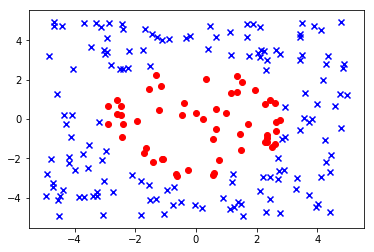

In [168]:
data = pd.read_csv("KernelData.csv", sep=",", header=None)
red_data = data[data[2] == -1]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

X = data.values[:,:2]
y = data.values[:,2]

In [171]:
X_train = X[:100]
X_test = X[100:]
y_train = y[:100]
y_test = y[100:]
clf = SVC(C = 1.0, kernel = 'linear', degree = 2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7

In [173]:
clf = SVC(C = 1.0, kernel = 'poly', degree = 2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98

In [174]:
clf.support_

array([21, 63, 64, 65, 18, 26, 27, 69, 91])

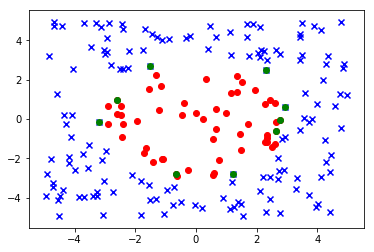

In [177]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
plt.scatter(X_train[clf.support_][:,0], X_train[clf.support_][:,1], color='green', marker='o')

In [184]:
clf = SVC(C = 1.0, kernel = 'rbf', gamma = 0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97

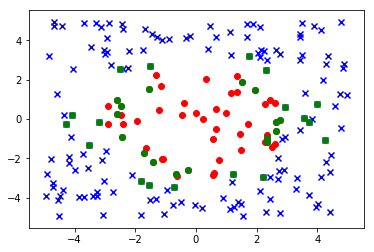

In [185]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
plt.scatter(X_train[clf.support_][:,0], X_train[clf.support_][:,1], color='green', marker='o')

More on [3]

## References
[1] C. M. Bishop, Pattern Recognition and Machine Learning 

[2] http://web.eecs.umich.edu/~cscott/past_courses/eecs598w14/notes/13_kernel_methods.pdf

[3] Vu Huu Tiep, machinelearningcoban.com blog, https://machinelearningcoban.com/2017/04/22/kernelsmv/

[4] http://130.243.105.49/Research/Learning/courses/ml/2011/lectures/ML_2011_L04.pdf

[5] https://pdfs.semanticscholar.org/presentation/5a56/a93897162a6b473a4277c84c3047ce242264.pdf
